In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
CSV_FILE = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv'
data = pd.read_csv(CSV_FILE)
data = data.drop(['car_ID', 'CarName'], axis=1)
# Handling missing values
data.fillna(0, inplace=True)
# Encoding categorical variables with OneHotEncoder
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
X = data_encoded.drop(['price'], axis=1)
y = data_encoded['price']
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Model training
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# Model evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 8482008.48437192
R-squared Score: 0.8925566700320231


In [29]:
#Predicting price for cars using the above model
import pandas as pd
data = {
    'car_ID': [101, 102, 103],
    'symboling': [3, 2, 1],
    'CarName': ['CarA', 'CarB', 'CarC'],
    'fueltype': ['gas', 'gas', 'diesel'],
    'aspiration': ['std', 'std', 'turbo'],
    'doornumber': ['four', 'two', 'four'],
    'carbody': ['sedan', 'hatchback', 'wagon'],
    'drivewheel': ['fwd', 'rwd', 'rwd'],
    'enginelocation': ['front', 'front', 'front'],
    'wheelbase': [97.2, 95.1, 96.3],
    'carlength': [172.4, 173.4, 170.5],
    'carwidth': [65.4, 66.3, 64.4],
    'carheight': [52.4, 50.2, 55.5],
    'curbweight': [2337, 2824, 3285],
    'enginetype': ['ohc', 'ohc', 'ohcv'],
    'cylindernumber': ['four', 'six', 'eight'],
    'enginesize': [109, 136, 209],
    'fuelsystem': ['mpfi', 'mpfi', 'idi'],
    'boreratio': [3.19, 3.19, 3.62],
    'stroke': [3.4, 3.4, 3.39],
    'compressionratio': [10.0, 8.0, 22.5],
    'horsepower': [102, 115, 182],
    'peakrpm': [5500, 5500, 4800],
    'citympg': [24, 21, 15],
    'highwaympg': [30, 28, 22],
    'price': [0, 0, 0],
}
new_data = pd.DataFrame(data)
new_data.to_csv('new_data.csv', index=False)
new_data = new_data.drop(['car_ID', 'CarName'], axis=1)
new_data.fillna(0, inplace=True)
new_data_encoded = pd.get_dummies(new_data, columns=categorical_cols, drop_first=True)
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)
new_data_scaled = scaler.transform(new_data_encoded)
# Making predictions for the new data
predicted_prices = model.predict(new_data_scaled)
# Displaying predicted prices
new_data['predicted_price'] = predicted_prices
print(new_data[['carbody', 'fueltype', 'predicted_price']])

     carbody fueltype  predicted_price
0      sedan      gas      8545.629815
1  hatchback      gas     17693.695433
2      wagon   diesel     26818.381685


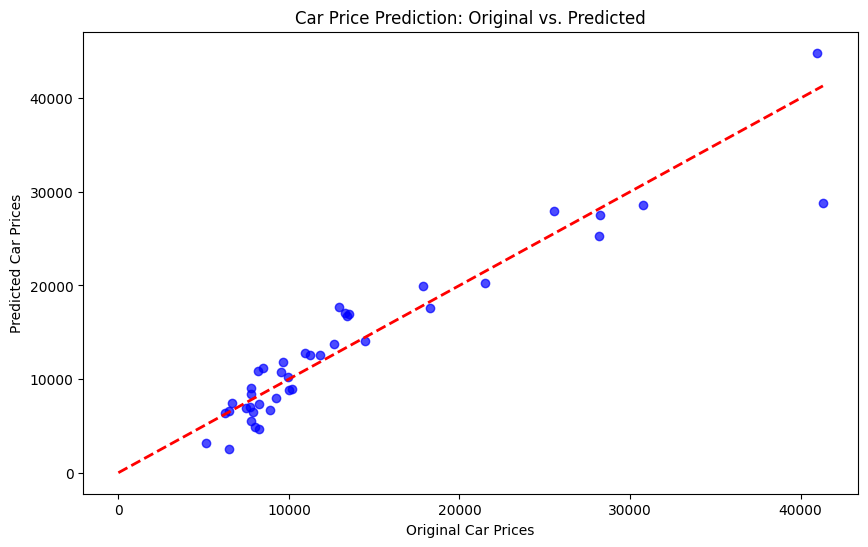

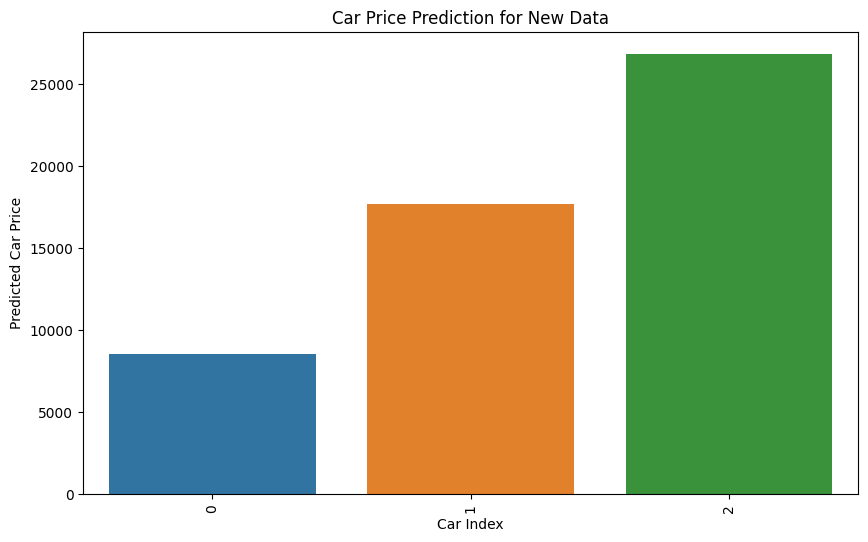

In [30]:
#Visualization of the model
predicted_prices = model.predict(new_data_scaled)
new_data['predicted_price'] = predicted_prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([0, max(y_test)], [0, max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Original Car Prices')
plt.ylabel('Predicted Car Prices')
plt.title('Car Price Prediction: Original vs. Predicted')
plt.show()
# Visualization of predicted prices for the new data
plt.figure(figsize=(10, 6))
sns.barplot(x=new_data.index, y='predicted_price', data=new_data)
plt.xlabel('Car Index')
plt.ylabel('Predicted Car Price')
plt.title('Car Price Prediction for New Data')
plt.xticks(rotation=90)
plt.show()